# Requirements

In [ ]:
# Add as many imports as you need.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [38]:
data = pd.read_csv("./data/climate-data.csv")

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [9]:
data.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [39]:
data = data.set_index('date')
data = data.sort_index()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [40]:
columns = data.columns

In [41]:
lags = 3
for i in range(1, lags+1):
  for col in columns:
    data[f'{col}_prev_{i}'] = data[col].shift(i)

In [42]:
data = data.dropna(axis=0)

In [43]:
data

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [ ]:
# Write your code here. Add as many boxes as you need.

In [44]:
X, Y = data.drop(columns='meantemp'), data['meantemp']

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)


## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [17]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [18]:
Y_pred_rf = rf_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [19]:
mae = mean_absolute_error(Y_test, Y_pred_rf)
mse = mean_squared_error(Y_test, Y_pred_rf)
r2 = r2_score(Y_test, Y_pred_rf)

In [20]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1.1442218078632838
Mean Squared Error (MSE): 2.093282453480575
R^2 Score: 0.9346493057111569


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [24]:
xgb_model = XGBRegressor(max_depth=5,random_state=42)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [25]:
Y_pred_xgb = xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [26]:
mae = mean_absolute_error(Y_test, Y_pred_xgb)
mse = mean_squared_error(Y_test, Y_pred_xgb)
r2 = r2_score(Y_test, Y_pred_xgb)

In [27]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1.1748027089723183
Mean Squared Error (MSE): 2.2186470125854054
R^2 Score: 0.9307355190345938


# Laboratory Exercise - Bonus Task (+ 2 points)

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.


In [ ]:
# Write your code here. Add as many boxes as you need.

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [46]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
#model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

In [47]:
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])



In [50]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.6260 - mean_absolute_error: 8.2398 - mean_squared_error: 93.6260
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 86.1053 - mean_absolute_error: 8.0248 - mean_squared_error: 86.1053
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.0002 - mean_absolute_error: 7.3546 - mean_squared_error: 72.0002
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 69.4178 - mean_absolute_error: 7.3100 - mean_squared_error: 69.4178
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.8437 - mean_absolute_error: 7.1709 - mean_squared_error: 65.8437
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 61.1395 - mean_absolute_error: 6.9509 - mean_squared_error: 61.1395
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57.7807 - mean_absolute_error: 6.7302 - mean_squared_error: 57.7807
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56.9602 - mean_absolute_error: 6.6405 - mean

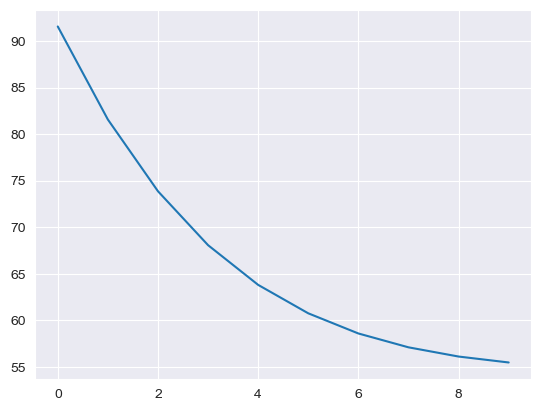

In [51]:
plt.plot(history.history['loss'])
plt.show()

In [53]:
preds = model.predict(X_test)
mean_squared_error(Y_test, preds), mean_absolute_error(Y_test, preds), r2_score(Y_test, preds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(62.28385970340403, 7.087657881197026, -0.944454972064821)

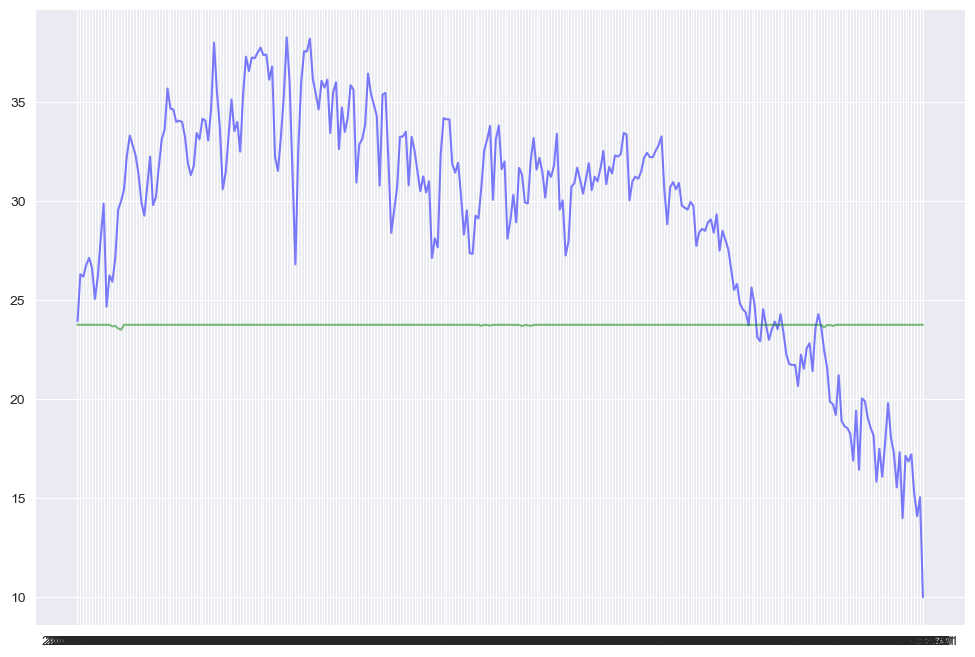

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(Y_test, color = 'blue', label = 'Actual',alpha = 0.5)
plt.plot(preds, color = 'green', label = 'Predicted', alpha = 0.5)
plt.show()